Supernovae 1A

In [3]:
import camb as camb
import matplotlib.pyplot as plt
import numpy as np

/home/fish31/anaconda3/envs/acc-env/lib/python3.12/site-packages/numpy/_core/getlimits.py:551: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


Theory Prediction

In [4]:
pars = camb.CAMBparams() #CAMBparams: structure base class from camb module
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122) # set_cosmology: sets a wide selection of cosmological parameters
results = camb.get_background(pars)
z = np.linspace(0.01,4,100) # redshift vector array, 100 steps in between 0.01 and 4 provided by linspace function
mu = 5. * np.log10(results.luminosity_distance(z)) # magnitude vector array, as a function of redshift (astrophysical expression)

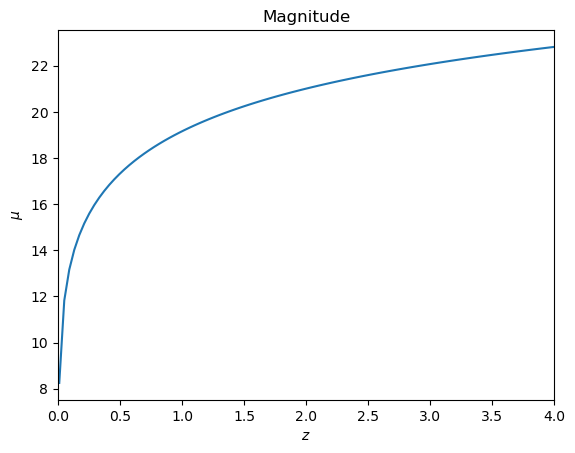

In [7]:
plt.plot(z, mu)
plt.xlabel('$z$')
plt.ylabel(r'$\mu$')
plt.title('Magnitude')
plt.xlim([0,4]);

Obs Data

In [10]:
data = np.loadtxt('fit_exercise_data.txt')
obs_z = data[:, 0]
obs_mu = data[:, 1]

covariance = np.loadtxt('fit_exercise_covariance.txt')

Text(0.5, 1.0, 'Magnitude Obs')

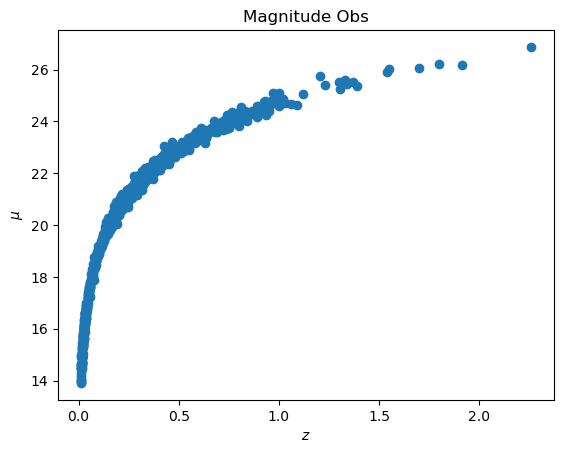

In [13]:
plt.plot(data[:,0], data[:,1], 'o')
plt.xlabel('$z$')
plt.ylabel(r'$\mu$')
plt.title('Magnitude Obs')

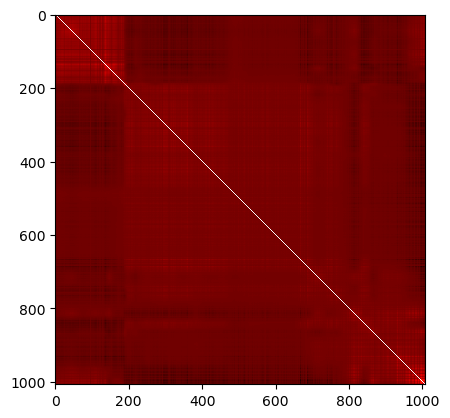

In [14]:
correlation = np.corrcoef(covariance)
plt.imshow(correlation, cmap='hot', interpolation='nearest')

Text(0.5, 1.0, 'Magnitude Obs')

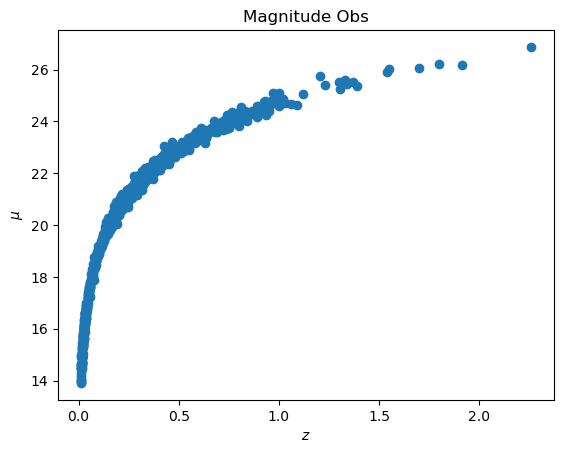

In [17]:
plt.plot(obs_z, obs_mu, 'o')
plt.xlabel('$z$')
plt.ylabel(r'$\mu$')
plt.title('Magnitude Obs')

### Likelihood

In [18]:
inv_cov = np.linalg.inv(covariance)

In [19]:
def likelihood(omegam):
    # compute mu_model
    pars = camb.CAMBparams()
    H0 = 70.
    h = H0/100
    pars.set_cosmology(H0=H0, ombh2=omegam * h**2 * 0.15, omch2=omegam * h**2 * 0.85)
    results = camb.get_background(pars)
    mu = 5. * np.log10(results.luminosity_distance(obs_z))
    # build likelihood
    residuals = mu - obs_mu
    like = -0.5 * np.dot(residuals, np.dot(inv_cov, residuals)) # np.dot compute tensor products, no matter tha tensor rank, self-evaluated
    ones = np.ones_like(residuals) # ones_like creates a unitary tensor, same form of the input one
    temp_1 = np.dot(ones, np.dot(inv_cov, residuals))
    temp_2 = np.dot(ones, np.dot(inv_cov, ones))
    like += 0.5 * temp_1**2 / temp_2 
    # return likelihood
    return like

In [53]:
# omegam = 0.3 
# omega matter, while ombh is omega baryons * h**2, omch is omega cold dark matter * h**2
# omega baryons and omega cold dark matter are fractions of omega matter

In [20]:
omegam_grid = np.linspace(0.1, 0.9, 1000)
likelihoods = np.array([likelihood(omegam) for omegam in omegam_grid])
likelihoods = likelihoods - np.max(likelihoods) # rescaling log by its maximum max

Text(0, 0.5, 'Likelihood')

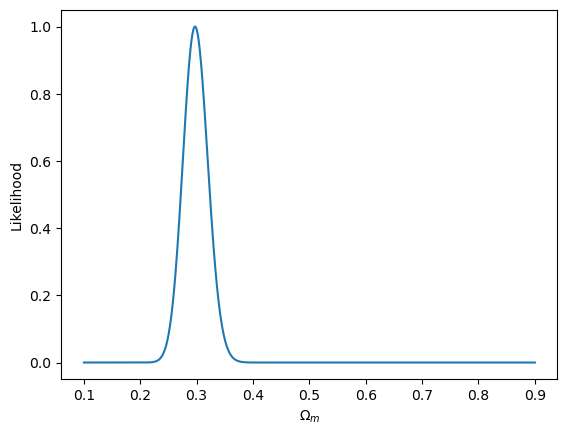

In [21]:
plt.plot(omegam_grid, np.exp(likelihoods))
plt.xlabel(r'$\Omega_m$')
plt.ylabel('Likelihood')

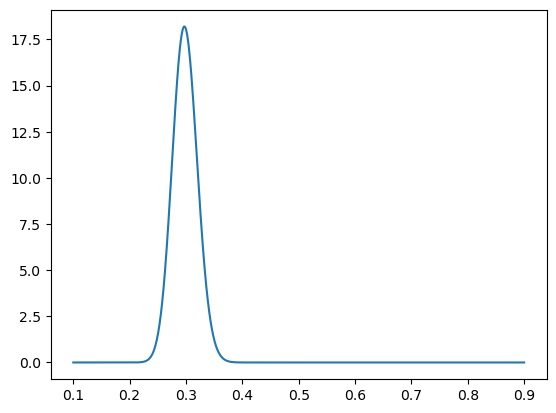

In [22]:
# integration to 1, now I can compute variance and all momenta
norm = np.trapezoid(np.exp(likelihoods), omegam_grid)
posterior = np.exp(likelihoods) / norm
plt.plot(omegam_grid, posterior)